In [1]:
%matplotlib notebook
import longview as lv

In [2]:
cli_train = lv.WatchClient()
cli_test = lv.WatchClient()
plot = lv.LinePlot()

<IPython.core.display.Javascript object>


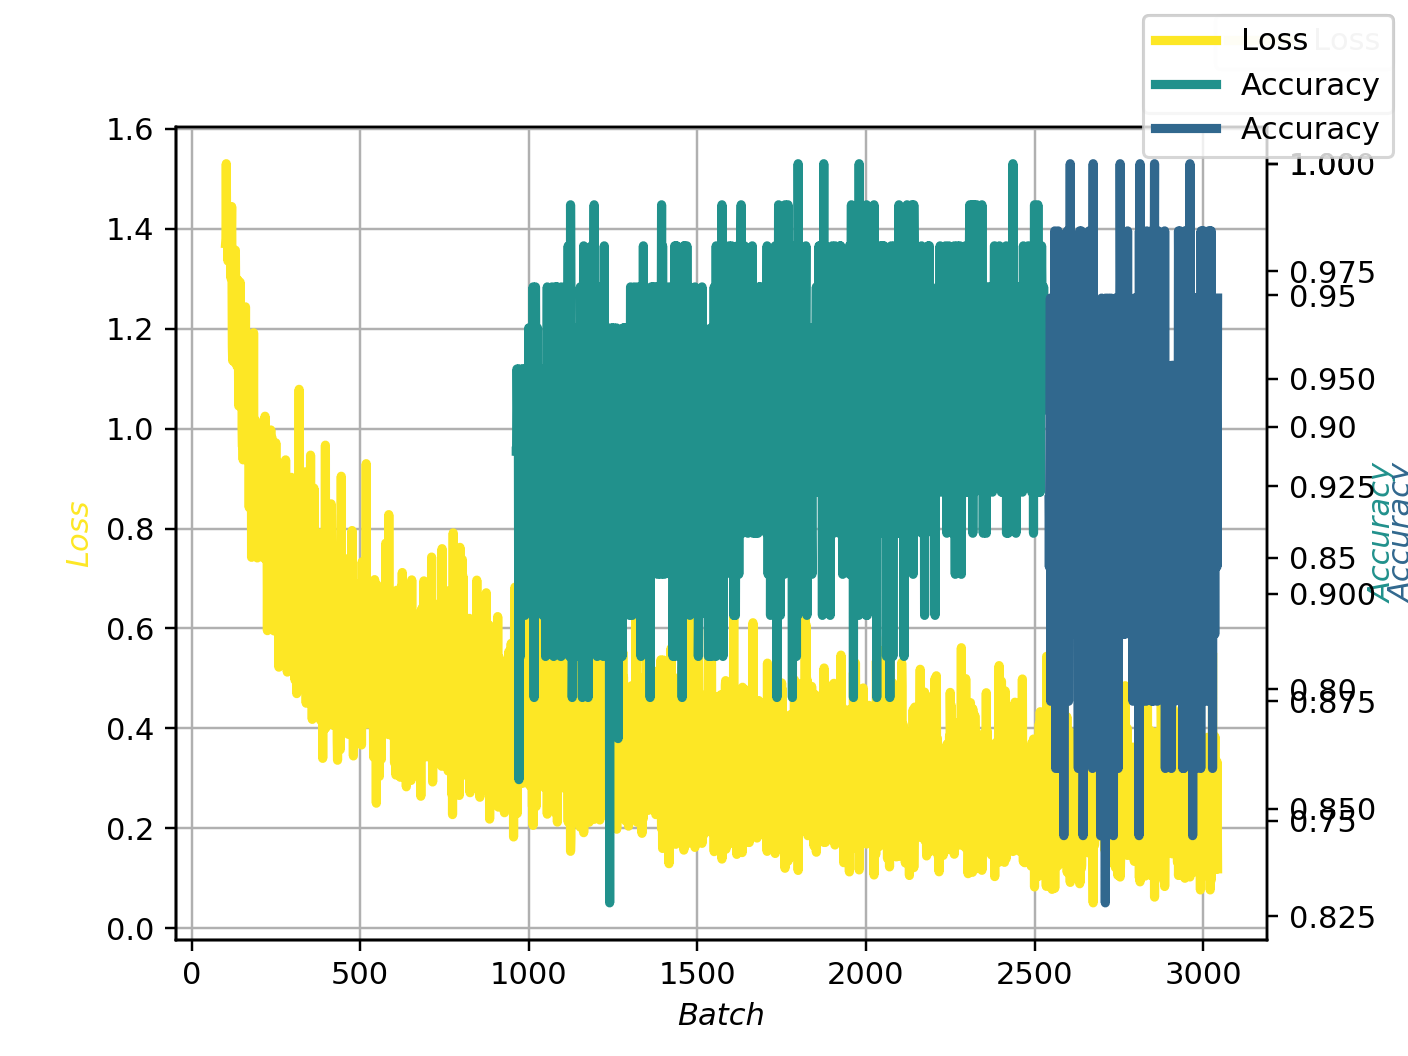

In [3]:
s1 = cli_train.create_stream('batch', 'map(lambda d:d.metrics.batch_loss, l)')
plot.show(s1, 'Batch', 'Loss')

In [5]:
s2 = cli_train.create_stream('batch', 'map(lambda d:d.metrics.batch_accuracy, l)')
plot.show(s2, 'Batch', 'Accuracy')

In [6]:
s3 = cli_test.create_stream('batch', 'map(lambda d:d.metrics.batch_accuracy, l)')
plot.show(s2, 'Batch', 'Accuracy')